In [1]:
# define a pytensor Op for our likelihood function
import os
from pathlib import Path

from pl_temp_fit import Exp_data_utils, config_utils

os.chdir(
    "/media/mohammed/Work/Work/pl_temp_fit/"
)  # os.chdir('C:\\Users\\ma11115\\OneDrive - Imperial College London\\pl_temp_fit')

In [2]:
# read csv data from folder

csv_files = list(Path("experiemental_data/blends/").glob("*.csv"))
for _id, file in enumerate(csv_files):
    print(_id, file)

0 experiemental_data/blends/PM6Y61_1_test_PL.csv
1 experiemental_data/blends/PM6Y61_1_test_EL.csv
2 experiemental_data/blends/PM6Y61_1PL.csv
3 experiemental_data/blends/PM6Y61_1EL.csv


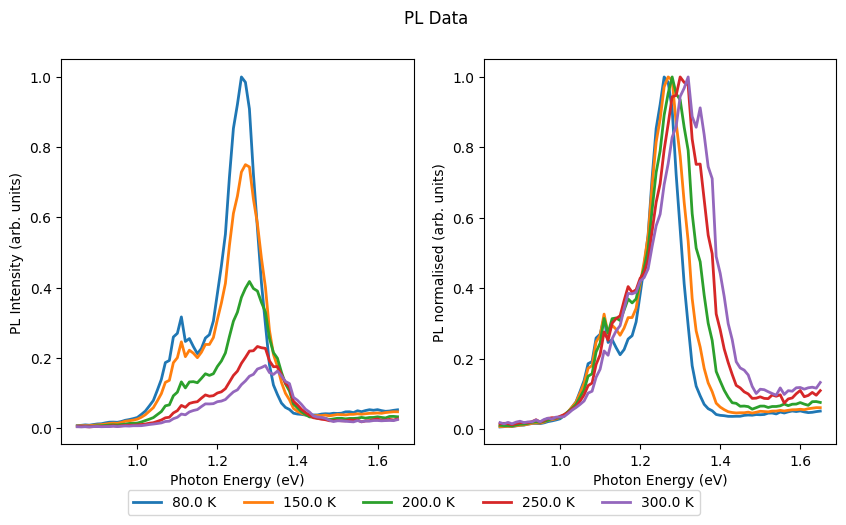

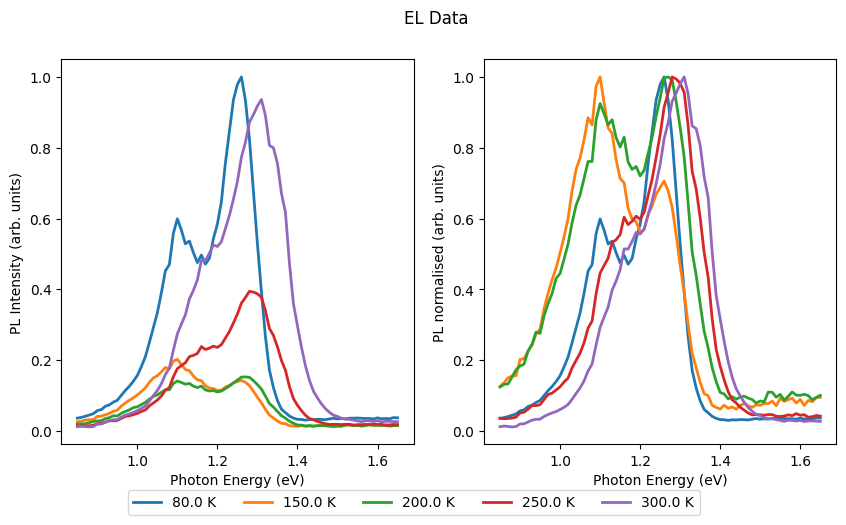

In [3]:
# plot EL and PL data
csv_name_pl = csv_files[0]  # 3 for y6, 18 for ITIC,12 for L8BO
csv_name_el = csv_files[1]  # 3 for y6, 18 for ITIC,12 for L8BO
Exp_data_pl, temperature_list_pl, hws_pl = Exp_data_utils.read_data(
    csv_name_pl
)
fig, ax = Exp_data_utils.plot_pl_data(
    Exp_data_pl, temperature_list_pl, hws_pl, title="PL Data"
)
Exp_data_el, temperature_list_el, hws_el = Exp_data_utils.read_data(
    csv_name_el
)
fig, ax = Exp_data_utils.plot_pl_data(
    Exp_data_el, temperature_list_el, hws_el, title="EL Data"
)

In [4]:
csv_name_el

PosixPath('experiemental_data/blends/PM6Y61_1_test_EL.csv')

In [5]:
# initialise parameters for the model


(
    number_free_parameters,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_pl,
    relative_intensity_std_error_el,
    sigma,
) = (5, 10, 0.005, 0.05, 0.1, 0.001)
fixed_parameters_dict = {
    "EX": {},
    "CT": {"off": 0, "sigma": 0.001},
    "D": {},
}
params_to_fit_init = {
    "EX": {"E": 1.37, "sigma": 0.001, "Li": 7.8e-2, "Lo": 0.11, "hO": 0.159},
    "CT": {"E": 1.2, "Li": 7.8e-2, "Lo": 0.11, "hO": 0.159, "log_fosc": -3},
    "D": {"log_kEXCT": 10},
}
min_bounds = {
    "EX": {"E": 1.3, "sigma": 0.001, "Li": 0.03, "Lo": 0.03, "hO": 0.1},
    "CT": {"E": 0.8, "Li": 0.03, "Lo": 0.03, "hO": 0.1, "log_fosc": -5},
    "D": {"log_kEXCT": 8},
}
max_bounds = {
    "EX": {"E": 1.5, "sigma": 0.03, "Li": 0.2, "Lo": 0.2, "hO": 0.2},
    "CT": {"E": 1.35, "Li": 0.2, "Lo": 0.2, "hO": 0.2, "log_fosc": -1},
    "D": {"log_kEXCT": 12},
}
# save the model config
model_config, test_id = config_utils.save_model_config(
    csv_name_pl,
    csv_name_el,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_pl,
    relative_intensity_std_error_el,
    temperature_list_pl,
    hws_pl,
    temperature_list_el,
    hws_el,
    sigma,
    fixed_parameters_dict,
    params_to_fit_init,
    min_bounds,
    max_bounds,
)

size of hw is (81,)
size of temperature_list is (5,)


## load model config and check 

In [6]:
# get test_ids in the database
model_config_files = list(
    Path("fit_experimental_emcee_el/fit_data_base/").glob("*.json")
)
test_id_list = []
for id, model_config_file in enumerate(model_config_files):
    print(id, model_config_file)
    test_id = model_config_file.name.replace(".json", "")
    test_id_list.append(test_id)
    model_config, model_config_save = config_utils.load_model_config(
        test_id, database_folder="fit_experimental_emcee_el/fit_data_base/"
    )
    print(model_config_save["csv_name_pl"].split("/")[-1])

0 fit_experimental_emcee_el/fit_data_base/48f8de8c-360d-4a1a-b74c-a3b9d67705bc.json
PM6Y61_1_test_PL.csv
1 fit_experimental_emcee_el/fit_data_base/bc820ca7-a9cd-4d11-b8b2-5cbf268c6a2a.json
PM6Y61_1_test_PL.csv
2 fit_experimental_emcee_el/fit_data_base/547fe652-d2e5-4f84-befa-ff5901c83d14.json
PM6Y61_1_test_PL.csv
3 fit_experimental_emcee_el/fit_data_base/4e598bf2-106a-4499-8618-5f184850eb44.json
PM6Y61_1_test_PL.csv


In [7]:
test_id = test_id_list[0]
model_config, model_config_save = config_utils.load_model_config(
    test_id, database_folder="fit_experimental_emcee_el/fit_data_base/"
)
fixed_parameters_dict, params_to_fit, min_bound, max_bound = (
    config_utils.get_dict_params(model_config_save)
)
csv_name = Path(model_config_save["csv_name_pl"])
Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)

In [8]:
# plot the results with initial parameters
# and the maximum and minumum bounds

import importlib

from pl_temp_fit import fit_el_utils

importlib.reload(fit_el_utils)
fit_el_utils.plot_fit_limits(model_config, model_config_save)

## modify the bonds

In [ ]:
(
    number_free_parameters,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_pl,
    relative_intensity_std_error_el,
    sigma,
) = (5, 10, 0.005, 0.05, 0.1, 0.001)
fixed_parameters_dict = {
    "EX": {},
    "CT": {"off": 0, "sigma": 0.001},
    "D": {},
}
params_to_fit_init = {
    "EX": {"E": 1.37, "sigma": 0.001, "Li": 7.8e-2, "Lo": 0.11, "hO": 0.159},
    "CT": {"E": 1.2, "Li": 7.8e-2, "Lo": 0.11, "hO": 0.159, "log_fosc": -3},
    "D": {"log_kEXCT": 10},
}
min_bounds = {
    "EX": {"E": 1.3, "sigma": 0.001, "Li": 0.03, "Lo": 0.03, "hO": 0.1},
    "CT": {"E": 0.8, "Li": 0.03, "Lo": 0.03, "hO": 0.1, "log_fosc": -5},
    "D": {"log_kEXCT": 8},
}
max_bounds = {
    "EX": {"E": 1.5, "sigma": 0.03, "Li": 0.2, "Lo": 0.2, "hO": 0.2},
    "CT": {"E": 1.35, "Li": 0.2, "Lo": 0.2, "hO": 0.2, "log_fosc": -1},
    "D": {"log_kEXCT": 12},
}
# save the model config
model_config, test_id = config_utils.save_model_config(
    csv_name_pl,
    csv_name_el,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_pl,
    relative_intensity_std_error_el,
    temperature_list_pl,
    hws_pl,
    temperature_list_el,
    hws_el,
    sigma,
    fixed_parameters_dict,
    params_to_fit_init,
    min_bounds,
    max_bounds,
)